# Running on IBM Quantum Hardware

**Course**: Quantum Computing Laboratory  
**Version**: 2.2 (Qiskit 2.2 Compatible)  
**Last Updated**: November 2025

---

## 📚 Overview

Learn how to access and execute quantum circuits on **real IBM Quantum hardware** using Qiskit 2.2's modern runtime services.

### Topics Covered:
- IBM Quantum account setup
- QiskitRuntimeService (new in Qiskit 2.0+)
- Backend selection strategies
- Job submission and monitoring
- Results analysis
- Best practices for hardware access

## 🎯 Learning Objectives

1. ✅ Set up IBM Quantum account
2. ✅ Configure QiskitRuntimeService
3. ✅ Select appropriate backends
4. ✅ Submit and monitor jobs
5. ✅ Analyze hardware results
6. ✅ Understand hardware limitations

## 🔧 Prerequisites

**Required:**
- IBM Quantum account (free at https://quantum.ibm.com)
- API token from IBM Quantum
- Qiskit 2.2+ installed
- qiskit-ibm-runtime package

**Installation:**
```bash
pip install qiskit==2.2.0 qiskit-ibm-runtime
```

## 🌐 Step 1: Get Your IBM Quantum Token

### How to Get Your Token:

1. **Create Account** (if you don't have one):
   - Go to https://quantum.ibm.com
   - Click "Sign up" or "Log in"
   - Complete registration (free)

2. **Find Your Token**:
   - Log in to IBM Quantum
   - Click your profile icon (top right)
   - Select "Account settings"
   - Find your API token
   - Click "Copy token"

3. **Important**: Keep your token **secret**! Never share it or commit it to Git.

### Free Tier Access (2025):
- **10 minutes/month** of quantum computing time
- Access to multiple quantum processors
- Simulator access (unlimited)
- Open quantum systems
- Queue priority: Standard

In [1]:
# Import QiskitRuntimeService (Qiskit 2.2)
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import warnings
warnings.filterwarnings('ignore')

print("✓ Imports successful!")
print("  QiskitRuntimeService ready (Qiskit 2.2)")

✓ Imports successful!
  QiskitRuntimeService ready (Qiskit 2.2)


## 💾 Step 2: Save Your Account (One-Time Setup)

### Save Credentials Securely

In [2]:
# FIRST TIME ONLY: Save your IBM Quantum account
# Replace 'YOUR_TOKEN_HERE' with your actual token

# Option 1: Save with token directly (for first time)
# QiskitRuntimeService.save_account(
#     channel="ibm_quantum",
#     token="YOUR_TOKEN_HERE",  # Paste your token here
#     set_as_default=True,
#     overwrite=True  # Use this to update token
# )

print("Account Setup Instructions:")
print("="*60)
print("1. Uncomment the code above")
print("2. Replace 'YOUR_TOKEN_HERE' with your actual token")
print("3. Run this cell once")
print("4. Comment it out again (for security)")
print("="*60)
print("\n⚠️  SECURITY: Never commit your token to Git!")
print("    Add this notebook to .gitignore if it contains your token")

Account Setup Instructions:
1. Uncomment the code above
2. Replace 'YOUR_TOKEN_HERE' with your actual token
3. Run this cell once
4. Comment it out again (for security)

⚠️  SECURITY: Never commit your token to Git!
    Add this notebook to .gitignore if it contains your token


### Better Approach: Use Environment Variable

In [3]:
# Recommended: Use environment variable for token
import os

# In your terminal, set: export IBM_QUANTUM_TOKEN="your_token_here"
# Or in Python:
# os.environ['IBM_QUANTUM_TOKEN'] = 'your_token_here'

# Then save:
# token = os.getenv('IBM_QUANTUM_TOKEN')
# if token:
#     QiskitRuntimeService.save_account(
#         channel="ibm_quantum",
#         token=token,
#         set_as_default=True,
#         overwrite=True
#     )
#     print("✓ Account saved successfully!")
# else:
#     print("✗ IBM_QUANTUM_TOKEN environment variable not set")

print("Using environment variables is more secure!")

Using environment variables is more secure!


## 🔌 Step 3: Load Your Account

In [2]:
# Load saved credentials (after setup)
try:
    service = QiskitRuntimeService()
    print("✓ IBM Quantum service loaded successfully!")
    print(f"  Connected as: {service._account.channel}")
except Exception as e:
    print(f"✗ Error loading service: {e}")
    print("\nTroubleshooting:")
    print("  1. Make sure you've run the save_account() step above")
    print("  2. Check your token is correct")
    print("  3. Verify internet connection")
    service = None

✓ IBM Quantum service loaded successfully!
  Connected as: ibm_quantum_platform


## 🖥️ Step 4: Explore Available Backends

In [3]:
# List all available backends
if service:
    backends = service.backends()
    
    print(f"Available backends: {len(backends)}")
    print("="*70)
    
    for backend in backends:
        config = backend.configuration()
        status = backend.status()
        
        # Backend info
        name = backend.name
        n_qubits = config.n_qubits
        operational = "✓" if status.operational else "✗"
        pending = status.pending_jobs
        simulator = "(Simulator)" if config.simulator else "(Hardware)"
        
        print(f"{operational} {name:20s} {n_qubits:2d} qubits  Queue: {pending:4d}  {simulator}")
    
    print("="*70)
else:
    print("Service not loaded. Please complete account setup first.")

Available backends: 3
✓ ibm_fez              156 qubits  Queue:   12  (Hardware)
✓ ibm_torino           133 qubits  Queue:    9  (Hardware)
✓ ibm_marrakesh        156 qubits  Queue: 22871  (Hardware)


## 🎯 Step 5: Smart Backend Selection

In [5]:
# Select least busy backend
if service:
    # Method 1: Least busy hardware backend
    backend = service.least_busy(
        operational=True,
        simulator=False,
        min_num_qubits=5
    )
    
    print("Selected Backend:")
    print("="*60)
    print(f"  Name: {backend.name}")
    print(f"  Qubits: {backend.configuration().n_qubits}")
    print(f"  Queue: {backend.status().pending_jobs} jobs")
    print(f"  Operational: {backend.status().operational}")
    print("="*60)
    
    # Get backend properties
    config = backend.configuration()
    print(f"\nBackend Details:")
    print(f"  Max circuits: {config.max_experiments}")
    print(f"  Max shots: {config.max_shots}")
    print(f"  Basis gates: {', '.join(config.basis_gates[:5])}...")
else:
    backend = None
    print("No service available")

Selected Backend:
  Name: ibm_torino
  Qubits: 133
  Queue: 10 jobs
  Operational: True

Backend Details:
  Max circuits: 300
  Max shots: 100000
  Basis gates: cz, id, rz, sx, x...


### Alternative: Select Specific Backend

In [ ]:
# Method 2: Select by name
if service:
    # backend = service.backend('ibm_brisbane')  # Specific backend
    # backend = service.backend('ibm_sherbrooke')  # Another option
    
    # Method 3: Filter by criteria
    filtered_backends = service.backends(
        filters=lambda x: x.configuration().n_qubits >= 5 and 
                         not x.configuration().simulator and
                         x.status().operational
    )
    
    print(f"Backends with ≥5 qubits (operational): {len(filtered_backends)}")
    for b in filtered_backends[:5]:  # Show first 5
        print(f"  - {b.name}: {b.configuration().n_qubits} qubits")

## 🔨 Step 6: Create a Test Circuit

Test Circuit (Bell State):
  Qubits: 2
  Depth: 3
  Gates: 4


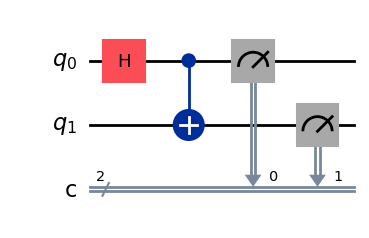

In [6]:
# Create a simple Bell state circuit
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

print("Test Circuit (Bell State):")
print(f"  Qubits: {qc.num_qubits}")
print(f"  Depth: {qc.depth()}")
print(f"  Gates: {qc.size()}")

qc.draw('mpl')

## 🚀 Step 7: Transpile for Hardware

In [8]:
# Transpile circuit for selected backend
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

if backend:
    print("Transpiling for hardware...")
    
    # Create pass manager with high optimization
    pm = generate_preset_pass_manager(
        optimization_level=3,  # Maximum optimization
        backend=backend
    )
    
    # Transpile
    transpiled_qc = pm.run(qc)
    
    print("\nTranspilation Results:")
    print("="*60)
    print(f"  Original depth: {qc.depth()}")
    print(f"  Transpiled depth: {transpiled_qc.depth()}")
    print(f"  Original gates: {qc.size()}")
    print(f"  Transpiled gates: {transpiled_qc.size()}")
    print(f"  2-qubit gates: {transpiled_qc.num_nonlocal_gates()}")
    print("="*60)
    
    print(f"\nCircuit optimized for: {backend.name}")
else:
    print("Backend not available for transpilation")
    transpiled_qc = qc

Transpiling for hardware...

Transpilation Results:
  Original depth: 3
  Transpiled depth: 7
  Original gates: 4
  Transpiled gates: 11
  2-qubit gates: 1

Circuit optimized for: ibm_torino


## 📤 Step 8: Submit Job to Hardware

In [9]:
# Submit job using SamplerV2
from qiskit_ibm_runtime import SamplerV2 as IBMSampler
import time

if backend:
    print(f"Submitting job to {backend.name}...")
    print("="*60)
    
    # Create sampler
    # non funziona   # sampler = IBMSampler(backend=backend)
    sampler = SamplerV2(backend)

    # Submit job
    job = sampler.run([transpiled_qc], shots=1024)
    
    print(f"✓ Job submitted!")
    print(f"  Job ID: {job.job_id()}")
    print(f"  Save this ID to retrieve results later!")
    print("="*60)
    
    # Store job ID for later retrieval
    job_id = job.job_id()
else:
    print("Backend not available")
    job = None

Submitting job to ibm_torino...
✓ Job submitted!
  Job ID: d4on1d7t3pms7395cpm0
  Save this ID to retrieve results later!


## ⏱️ Step 9: Monitor Job Progress

In [13]:
# Monitor job with timeout
if job:
    print("Monitoring job progress...")
    print("="*60)
    
    start_time = time.time()
    max_wait = 3600  # 1 hour timeout
    check_interval = 30  # Check every 30 seconds
    
    while job.status() not in ['DONE', 'ERROR', 'CANCELLED']:
        elapsed = int(time.time() - start_time)
        
        if elapsed > max_wait:
            print("\n⚠️  Timeout exceeded (1 hour)")
            print("  Job is still running - retrieve later with job ID")
            break
        
        # Get status
        status = job.status()
        #queue_pos = job.queue_position()
        
        # Display progress
        print(f"[{elapsed:4d}s] Status: {status:15s}", end="")
        #if queue_pos:
        #    print(f" | Queue position: {queue_pos}")
        #else:
        #    print(" | Running...")
        #
        if status in ['DONE', 'ERROR', 'CANCELLED']:
            break
        
        time.sleep(check_interval)
    
    print("="*60)
    print(f"Final status: {job.status()}")
    print(f"Total time: {int(time.time() - start_time)}s")

Monitoring job progress...
[   0s] Status: QUEUED         [  31s] Status: QUEUED         [  61s] Status: QUEUED         [  92s] Status: QUEUED         [ 123s] Status: QUEUED         [ 153s] Status: QUEUED         [ 184s] Status: QUEUED         [ 214s] Status: QUEUED         [ 245s] Status: QUEUED         [ 275s] Status: QUEUED         [ 306s] Status: QUEUED         [ 337s] Status: QUEUED         [ 367s] Status: QUEUED         [ 398s] Status: QUEUED         [ 429s] Status: QUEUED         [ 459s] Status: QUEUED         [ 490s] Status: QUEUED         [ 520s] Status: QUEUED         [ 551s] Status: QUEUED         [ 581s] Status: QUEUED         [ 612s] Status: QUEUED         [ 643s] Status: QUEUED         [ 673s] Status: QUEUED         [ 704s] Status: QUEUED         [ 734s] Status: QUEUED         [ 764s] Status: QUEUED         

KeyboardInterrupt: 

In [14]:
print(job.metrics())

{'timestamps': {'created': '2025-12-04T11:29:56.262551Z', 'finished': None, 'running': None}, 'bss': {'seconds': 0}, 'usage': {'quantum_seconds': 0, 'seconds': 0}, 'qiskit_version': 'qiskit_ibm_runtime-0.43.1,qiskit-2.2.3*,qiskit_aer-0.17.2*', 'caller': 'qiskit_ibm_runtime~sampler.py'}


### Retrieve Job Later

In [ ]:
# Retrieve a job by ID (useful if you closed notebook)
if service:
    # Replace with your job ID
    # retrieved_job = service.job('YOUR_JOB_ID_HERE')
    # print(f"Retrieved job status: {retrieved_job.status()}")
    
    print("To retrieve a job later:")
    print("  job = service.job('your_job_id_here')")
    print("  result = job.result()")

## 📊 Step 10: Get and Analyze Results

In [ ]:
# Get results
if job and job.status().name == 'DONE':
    print("Retrieving results...")
    
    result = job.result()
    counts = result[0].data.meas.get_counts()
    
    print("\n✓ Results obtained!")
    print("="*60)
    print("Measurement outcomes:")
    for state, count in sorted(counts.items(), key=lambda x: -x[1]):
        prob = count / sum(counts.values())
        print(f"  |{state}⟩: {count:4d} ({prob:.3f})")
    print("="*60)
    
    # Plot
    plot_histogram(counts, title=f'Results from {backend.name}')
else:
    print("Job not complete or not available")
    counts = None

## 🔬 Step 11: Compare with Ideal Simulation

In [ ]:
# Compare hardware results with ideal simulation
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as AerSampler
from qiskit.quantum_info import hellinger_fidelity
import matplotlib.pyplot as plt

if counts:
    # Run ideal simulation
    simulator = AerSimulator()
    sim_sampler = AerSampler()
    pm_sim = generate_preset_pass_manager(optimization_level=1, backend=simulator)
    sim_qc = pm_sim.run(qc)
    
    sim_job = sim_sampler.run([sim_qc], shots=1024)
    sim_result = sim_job.result()
    sim_counts = sim_result[0].data.meas.get_counts()
    
    # Calculate fidelity
    fidelity = hellinger_fidelity(counts, sim_counts)
    
    print(f"\nSimulation vs Hardware Comparison")
    print("="*60)
    print(f"Hellinger Fidelity: {fidelity:.4f}")
    
    if fidelity > 0.95:
        print("✓ Excellent agreement!")
    elif fidelity > 0.85:
        print("✓ Good agreement (typical for NISQ devices)")
    elif fidelity > 0.70:
        print("⚠️  Moderate agreement (noticeable noise)")
    else:
        print("⚠️  Significant noise effects")
    print("="*60)
    
    # Plot comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    plot_histogram(sim_counts, ax=ax1, title='Ideal Simulation')
    plot_histogram(counts, ax=ax2, title=f'Hardware ({backend.name})')
    plt.tight_layout()
    plt.show()

## 💡 Best Practices

### 1. Always Simulate First

In [ ]:
print("Hardware Execution Workflow:")
print("="*60)
print("1. ✓ Develop circuit in simulation")
print("2. ✓ Verify circuit logic works correctly")
print("3. ✓ Optimize circuit depth and gate count")
print("4. ✓ Test transpilation for target backend")
print("5. ✓ Submit to hardware")
print("6. ✓ Compare results with simulation")
print("="*60)
print("\nWhy simulate first?")
print("  • Hardware time is limited (free tier: 10 min/month)")
print("  • Queue times can be long")
print("  • Debugging is much faster in simulation")
print("  • Validate circuit before using quantum time")

### 2. Manage Your Quantum Time

In [ ]:
# Estimate quantum time usage
def estimate_quantum_time(circuit, shots=1024, gate_time_ns=100):
    """
    Estimate quantum execution time.
    
    Args:
        circuit: QuantumCircuit
        shots: Number of circuit repetitions
        gate_time_ns: Average gate time in nanoseconds
    
    Returns:
        Estimated time in seconds
    """
    # Circuit execution time per shot
    circuit_time = circuit.size() * gate_time_ns * 1e-9
    
    # Total quantum time
    total_time = circuit_time * shots
    
    return total_time

# Example
est_time = estimate_quantum_time(transpiled_qc)
print(f"Estimated quantum time: {est_time*1000:.2f} ms")
print(f"With queue/overhead: ~{est_time*10:.2f}s - {est_time*60:.2f}s")
print(f"\nFree tier budget: 600 seconds/month")
print(f"This job uses: ~{est_time:.4f}s ({est_time/600*100:.2f}% of monthly quota)")

### 3. Error Handling

In [ ]:
# Robust job submission
def submit_job_safely(sampler, circuit, shots=1024):
    """
    Submit job with error handling.
    """
    try:
        job = sampler.run([circuit], shots=shots)
        print(f"✓ Job submitted: {job.job_id()}")
        return job
    except Exception as e:
        print(f"✗ Error submitting job: {e}")
        return None

print("Error handling best practices:")
print("  • Always wrap submissions in try-except")
print("  • Save job IDs immediately")
print("  • Implement timeouts for monitoring")
print("  • Handle network interruptions gracefully")

## 📖 References

### Documentation

1. **IBM Quantum Platform**:  
   https://quantum.ibm.com

2. **QiskitRuntimeService Guide**:  
   https://docs.quantum.ibm.com/guides/setup-channel

3. **Primitives (Sampler/Estimator)**:  
   https://docs.quantum.ibm.com/guides/primitives

### Troubleshooting

**Common Issues:**

1. **"Invalid credentials"**: Token expired or incorrect
2. **"Backend not found"**: Backend name changed or unavailable
3. **Long queue times**: Use `least_busy()` or off-peak hours
4. **Job timeout**: Normal for busy systems, retrieve later

**Getting Help:**
- Qiskit Slack: https://qisk.it/join-slack
- Stack Exchange: https://quantumcomputing.stackexchange.com
- IBM Quantum Support: https://quantum.ibm.com/support

---

**Course**: Quantum Computing Laboratory  
**License**: MIT  
**Version**: 2.2.0  
**Last Updated**: November 2025